<a href="https://www.kaggle.com/code/jy2040/task1-ann?scriptVersionId=94539412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Task 1 Artificial Neural Network

1. Load the dataset (CIFAR – 10) from the given link:
https://www.cs.toronto.edu/~kriz/cifar.html (2 points)
<br>
This dataset consists of 60,000 images of 10 different classes, 6,000 images per class and
50,000 (5,000 per class in training) and 10,000 (1,000 per class in testing)

In [10]:
# This piece of code enables display of multiple output from one cell.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [11]:
# libraries
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Ftrl, Nadam 
from keras.regularizers import l1
from tensorflow.keras.constraints import max_norm, MinMaxNorm, NonNeg, UnitNorm
from keras import backend as K
import matplotlib.pyplot as plt

In [12]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [13]:
# loading all the files from cifar-10 dataset
batches_meta = unpickle('../input/cifar10/batches.meta')
data_batch_1 = unpickle('../input/cifar10/data_batch_1')
data_batch_2 = unpickle('../input/cifar10/data_batch_2')
data_batch_3 = unpickle('../input/cifar10/data_batch_3')
data_batch_4 = unpickle('../input/cifar10/data_batch_4')
data_batch_5 = unpickle('../input/cifar10/data_batch_5')
test_batch = unpickle('../input/cifar10/test_batch')

In [14]:
# meta file
batches_meta
print("There are total",len(batches_meta['label_names']),"classes")

There are total 10 classes


In [15]:
data = []
labels = []

In [16]:
def makeDF(batch,d,l):
    d.extend(batch['data'])
    l.extend(batch['labels'])
    return d,l

In [17]:
data,labels = makeDF(data_batch_1,data,labels)
data,labels = makeDF(data_batch_2,data,labels)
data,labels = makeDF(data_batch_3,data,labels)
data,labels = makeDF(data_batch_4,data,labels)
data,labels = makeDF(data_batch_5,data,labels)

In [18]:
# libraries
import matplotlib.pyplot as plt

In [19]:
def reshapeImage(d):
    for i in range(len(d)):
        d[i] = d[i].reshape(3,32,32)
        d[i] = d[i].transpose(1,2,0)
    return d

In [20]:
# reshape the data
data = reshapeImage(data)

2. Explain in your own words: (7 points)<br>
a. Gradient Descent (1 point)<br>
b. Drop out (1 point)<br>
c. Activation functions (1 point)<br>
d. Back Propagation (1 point)<br>
e. Epochs, Iterations and Batch size (3 points)

In [21]:
'''
a. Gradient Descent: It is an optimization algorithm that tries to find the value of coefficients of function f such that
it minimizes the cost function.
Starts with a small random value -> coefficient = 0.0 -> cost = f(coefficient) -> delta = derivative(cost) ->
coefficient = coefficient – (alpha * delta)
where alpha is a learning rate

b. Drop out: This algorithm is used to avaoid the co-adoption. It randomly drops the units from the nueral network. Their 
contribution to the activation of downstream neurons is transiently evacuated on the forward pass and updated weights are
not applied to the neuron on the backward pass

c. Activation Function: Activation funcitons decides whether a neuron will be activated or not. In other words, it decides
which neurons will usefull for the network's input. Examples..., sigmoid, tanh,etc...

d. Back Propagation: Back propagation is an algorithm that tries to calculate the derivatives or the Artificial neural
networks. ANN uses backpropagation as a learning algorithm to compute a gradient descent with respect to weights
It evaluates the expression for the derivatives of the cost function as a product of derivatives between each layes
backwards with gardient of the weights between each layers being a simple modification of the partial products.

e. i) Epochs: 1 Epoch means training the neural network with all the training data for one cycle. 1 cycle means a 
   forward pass and backward pass in one go. We use all data during one cycle.
   ii) Iterations: It is a number of psses, each pass using number of examples from dataset(batch size). One pass consist
   of one forward pass and one backward pass. 
   iii) Batch size: The batch size defines the number of samples that will be propagated through the network. The purpose is
   not to give much computational load to the model.

'''

"\na. Gradient Descent: It is an optimization algorithm that tries to find the value of coefficients of function f such that\nit minimizes the cost function.\nStarts with a small random value -> coefficient = 0.0 -> cost = f(coefficient) -> delta = derivative(cost) ->\ncoefficient = coefficient – (alpha * delta)\nwhere alpha is a learning rate\n\nb. Drop out: This algorithm is used to avaoid the co-adoption. It randomly drops the units from the nueral network. Their \ncontribution to the activation of downstream neurons is transiently evacuated on the forward pass and updated weights are\nnot applied to the neuron on the backward pass\n\nc. Activation Function: Activation funcitons decides whether a neuron will be activated or not. In other words, it decides\nwhich neurons will usefull for the network's input. Examples..., sigmoid, tanh,etc...\n\nd. Back Propagation: Back propagation is an algorithm that tries to calculate the derivatives or the Artificial neural\nnetworks. ANN uses ba

3. Visualize / summarize the data (10 points)<br>
a. Number of entities in training and testing set and number of classes in target variable (1 point)<br>
b. Number of pixels in the image (Height and width individually) (2 points)<br>
c. Number of images per class (1 point)<br>
d. Display at least 2 images of each class (6 points)


In [22]:
test_data_new = test_batch['data']
test_data = []
test_labels = test_batch['labels']
for i in range(len(test_data_new)):
    temp = test_data_new[i].reshape(3,32,32)
    temp = temp.transpose(1,2,0)
    test_data.append(temp)

In [23]:
'''
a. Number of entities in training and testing set and number of classes in target variable
'''
print("Number of entities in tarining set:",len(data),"and there are",len(np.unique(np.array(labels))),"uniques classes in the target variable")
print("Number of entities in tarining set:",len(test_data),"and there are",len(np.unique(np.array(test_labels))),"uniques classes in the target variable")

Number of entities in tarining set: 50000 and there are 10 uniques classes in the target variable
Number of entities in tarining set: 10000 and there are 10 uniques classes in the target variable


In [24]:
'''
b.  Number of pixels in the image (Height and width individually)
'''
print("There are total",data[0].shape[0],"pixels in height and",data[0].shape[1],"pixels in width and",data[0].shape[2],"color channels in each image")

There are total 32 pixels in height and 32 pixels in width and 3 color channels in each image


In [25]:
'''
c. Number of images per class
'''
number_list = np.array(labels)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print("Number of images per class(class -> number of images) for training data...\n",frequencies)
number_list = np.array(test_labels)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print("Number of images per class(class -> number of images) for test data...\n",frequencies)

Number of images per class(class -> number of images) for training data...
 [[   0 5000]
 [   1 5000]
 [   2 5000]
 [   3 5000]
 [   4 5000]
 [   5 5000]
 [   6 5000]
 [   7 5000]
 [   8 5000]
 [   9 5000]]
Number of images per class(class -> number of images) for test data...
 [[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]
 [   5 1000]
 [   6 1000]
 [   7 1000]
 [   8 1000]
 [   9 1000]]


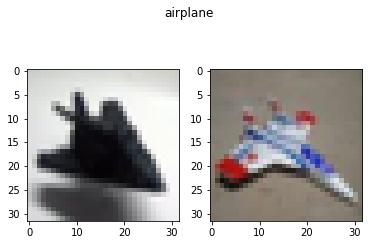

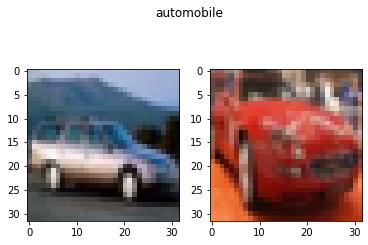

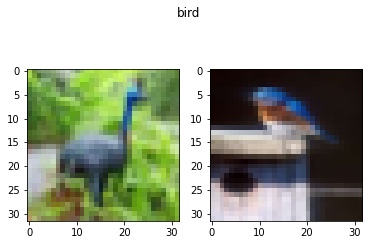

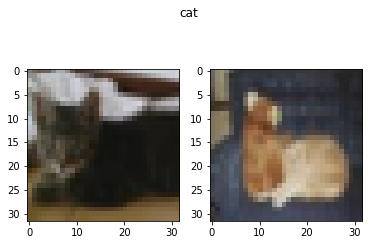

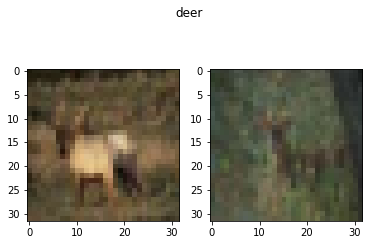

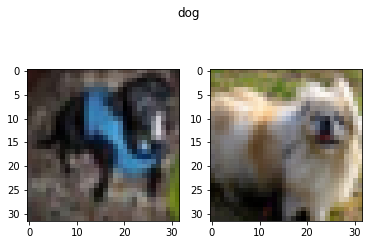

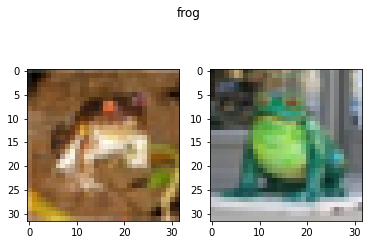

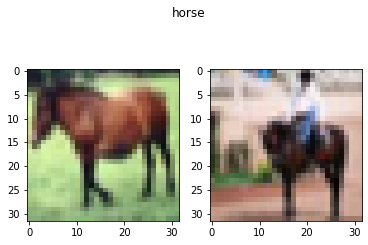

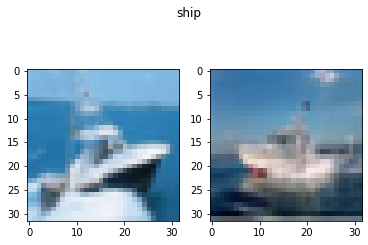

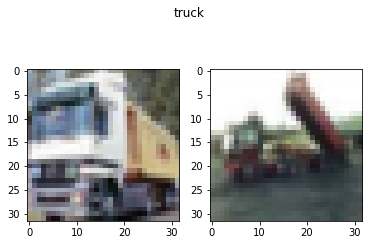

In [26]:
'''
d. Display at least 2 images of each class
'''
indices_of_each_iamge_2 = []
labels_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for idx in range(10):
    indices = [i for i, x in enumerate(labels) if x == idx]
    indices_of_each_iamge_2.append(indices[:2])
for i in range(len(labels_names)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(labels_names[i])
    ax1.imshow(data[indices_of_each_iamge_2[i][0]])
    ax2.imshow(data[indices_of_each_iamge_2[i][1]])

4. Train a neural network (21 points)<br>
a. Decide number of layers and neurons in each layer (2 points)<br>
b. Try out different activation functions (explain each one you used) (4 points)<br>
c. Try with and without using drop out (4 points)<br>
d. Try different regularizations apart from drop out (4 points)<br>
e. Try different optimization algorithms (such as Gradient Descent, Adam etc.) (4 points)<br>
f. Create a graph of f1 score vs epochs for training and validation set. (2 points)<br>
g. Calculate number of trainable parameters in your final model. (1 point)

In [27]:
#dividing image pixel by 255 so that pixel comes in range 0 to 1...
training_images=np.array(data)/255.0
testing_images=np.array(test_data)/255.0

a. Decide number of layers and neurons in each layer

In [28]:
%%time
# initial model
# model without conv2d layer
# 1 -> 512,256,10 -> 0.4668
# 2 -> 128,128,10 -> 0.4558
# 3 -> 512,257,128,10 -> 0.4679
# 3 -> 512,257,128,10 -> 0.4906 (10 epochs)
# 4 -> 1024,512,257,128,10 -> 0.4804 (10 epochs)
model = Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation = 'relu'),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

# optimizers tried -> adam, SGD
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))

'''
5 layer model is giving good accuracy intially so choosing 5 layers for ANN model
'''

2022-05-02 05:28:18.648453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 05:28:18.795723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 05:28:18.796867: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 05:28:18.798646: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8484 - accuracy: 0.3387 - val_loss: 1.7123 - val_accuracy: 0.3867
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6573 - accuracy: 0.4085 - val_loss: 1.6144 - val_accuracy: 0.4252
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5748 - accuracy: 0.4398 - val_loss: 1.6131 - val_accuracy: 0.4298
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5140 - accuracy: 0.4608 - val_loss: 1.5121 - val_accuracy: 0.4633
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4662 - accuracy: 0.4805 - val_loss: 1.4878 - val_accuracy: 0.4708
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4268 - accuracy: 0.4928 - val_loss: 1.4617 - val_accuracy: 0.4774
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3886 - accuracy: 0.5068 - val_loss: 1.4619 - val_accuracy:

'\n5 layer model is giving good accuracy intially so choosing 5 layers for ANN model\n'

In [29]:
%%time
'''
Since we are getting low accuracy with only dense layers, I am adding conv2D layer in the model
'''
model = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]),
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation = 'relu'),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))

Epoch 1/10


2022-05-02 05:29:47.884900: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 16s 6ms/step - loss: 1.4318 - accuracy: 0.4847 - val_loss: 1.2126 - val_accuracy: 0.5758
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9826 - accuracy: 0.6538 - val_loss: 1.0454 - val_accuracy: 0.6349
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6716 - accuracy: 0.7655 - val_loss: 1.0410 - val_accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3858 - accuracy: 0.8659 - val_loss: 1.2703 - val_accuracy: 0.6395
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2093 - accuracy: 0.9289 - val_loss: 1.5659 - val_accuracy: 0.6315
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1317 - accuracy: 0.9575 - val_loss: 1.8254 - val_accuracy: 0.6379
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1093 - accuracy: 0.9646 - val_loss: 1.9396 - val_accuracy: 0.6252


In [30]:
model.summary()
'''
If we notice the performance of the above model, the training accuracy is increasing with desired rate, but validation 
accuracy is not after some epochs. This is a problem of overfitting.
Can use regularisation over here to overcome this problem,
and with this, we have to makes sure to descrease the trainable parameters of the model.
'''

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

'\nIf we notice the performance of the above model, the training accuracy is increasing with desired rate, but validation \naccuracy is not after some epochs. This is a problem of overfitting.\nCan use regularisation over here to overcome this problem,\nand with this, we have to makes sure to descrease the trainable parameters of the model.\n'

b. Try out different activation functions (explain each one you used)

In [31]:
%%time
# activation functions -> relu, leaky relu, softmax
# relu -> accuracy : 0.6212 -> wall time : 1min 23s
# leaky relu -> : 0.6061 -> wall time : 1min 23s

model = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation=tf.keras.layers.ReLU(), input_shape=[32,32,3]),
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation=tf.keras.layers.ReLU()),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = tf.keras.layers.ReLU()),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3657 - accuracy: 0.5140 - val_loss: 1.0891 - val_accuracy: 0.6217
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9411 - accuracy: 0.6691 - val_loss: 1.0070 - val_accuracy: 0.6450
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7243 - accuracy: 0.7452 - val_loss: 1.0600 - val_accuracy: 0.6433
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5252 - accuracy: 0.8161 - val_loss: 1.1829 - val_accuracy: 0.6360
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3346 - accuracy: 0.8844 - val_loss: 1.3541 - val_accuracy: 0.6323
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2036 - accuracy: 0.9297 - val_loss: 1.7046 - val_accuracy: 0.6374
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1338 - accuracy: 0.9549 - val_loss: 2.0261 - val_accuracy:

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 4,205,866
Trainable params: 4,205,866
Non-trainable params: 0
_________________________________________________________________


c. Try with and without using drop out

In [33]:
%%time
# without dropuout regularisation -> accuracy : 0.6212 -> wall time : 1min 23s
# with dropout at 0.2 rate regularization -> accuracy : 0.6609 -> Wall time: 1min 1s
model = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation=tf.keras.layers.ReLU(), input_shape=[32,32,3]),
    keras.layers.Conv2D(filters=32,kernel_size=3, activation=tf.keras.layers.ReLU()),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation = tf.keras.layers.ReLU()),
    keras.layers.Dense(10,activation = 'softmax')
])
opt = Adamax()
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))

'''
After adding dropout layer in the model, the accuracy boosted by around 6%,
I think changing the model, and adding layers in the model will be useful to boost the accuracy more.
Options we have as of now : Add more conv2D layers, add regularisation for conv2D layers.
WIth this, still trying to reduce the number of trainable parameters of the model
'''


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4267 - accuracy: 0.4926 - val_loss: 1.2412 - val_accuracy: 0.5619
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0974 - accuracy: 0.6150 - val_loss: 1.0912 - val_accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9543 - accuracy: 0.6686 - val_loss: 1.0258 - val_accuracy: 0.6426
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8374 - accuracy: 0.7111 - val_loss: 0.9866 - val_accuracy: 0.6576
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7384 - accuracy: 0.7469 - val_loss: 1.0048 - val_accuracy: 0.6579
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6487 - accuracy: 0.7786 - val_loss: 0.9783 - val_accuracy: 0.6703
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5638 - accuracy: 0.8083 - val_loss: 1.0622 - val_accuracy:

'\nAfter adding dropout layer in the model, the accuracy boosted by around 6%,\nI think changing the model, and adding layers in the model will be useful to boost the accuracy more.\nOptions we have as of now : Add more conv2D layers, add regularisation for conv2D layers.\nWIth this, still trying to reduce the number of trainable parameters of the model\n'

In [34]:
%%time
# changing the model layers and adding more conv2D layers and with that adding max pooling layers
# ,kernel_constraint=max_norm(2.)
model = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation=tf.keras.layers.ReLU(), input_shape=[32,32,3]),
    keras.layers.Conv2D(filters=32,kernel_size=3, padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='valid'),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation = tf.keras.layers.ReLU()),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

print(model.summary())

model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))

'''
Changine the model structure helped over here
Results : Validation Accuracy : 0.6704 -> 0.7631

Pooling Operation Methods :
Max Pooling : accuracy (dropout with 0.2 rate) -> 0.7631
Average Pooling : accuracy -> 0.7574
Max Pooling : accuracy (dropout with 0.5 rate) -> 0.7760
'''

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

'\nChangine the model structure helped over here\nResults : Validation Accuracy : 0.6704 -> 0.7631\n\nPooling Operation Methods :\nMax Pooling : accuracy (dropout with 0.2 rate) -> 0.7631\nAverage Pooling : accuracy -> 0.7574\nMax Pooling : accuracy (dropout with 0.5 rate) -> 0.7760\n'

d. Try different regularizations apart from drop out

In [35]:
%%time
# regularizations
# activity regularization -> accuracy : 0.7818
# weight constraint -> accuracy : 0.7861 
# weight constraint + activity regularization -> accuracy : 0.7793

model = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation=tf.keras.layers.ReLU(), input_shape=[32,32,3], kernel_constraint=max_norm(2.)),
    keras.layers.Conv2D(filters=32,kernel_size=3, padding="same", activation=tf.keras.layers.ReLU(), kernel_constraint=max_norm(2.)),
    keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='valid'),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU(), kernel_constraint=max_norm(2.)),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU(), kernel_constraint=max_norm(2.)),
    keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation = tf.keras.layers.ReLU(), activity_regularizer=l1(0.001)),
    keras.layers.Dense(10,activation = 'softmax')
])

opt = Nadam()
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))

'''
Other regularizations:
Noice -> adding noise to a neural network during training can improve the robustness of the network,
         resulting in better generalization and faster learning.
Early Stopping -> Monitor model performance on a validation set and stop training when performance degrades.
'''

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.4052 - accuracy: 0.5030 - val_loss: 1.0394 - val_accuracy: 0.6413
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9744 - accuracy: 0.6668 - val_loss: 0.8461 - val_accuracy: 0.7136
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8290 - accuracy: 0.7206 - val_loss: 0.7961 - val_accuracy: 0.7376
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7418 - accuracy: 0.7491 - val_loss: 0.7366 - val_accuracy: 0.7528
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6734 - accuracy: 0.7750 - val_loss: 0.7290 - val_accuracy: 0.7579
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6235 - accuracy: 0.7921 - val_loss: 0.6992 - val_accuracy: 0.7704
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5780 - accuracy: 0.8086 - val_loss: 0.7256 - val_ac

'\nOther regularizations:\nNoice -> adding noise to a neural network during training can improve the robustness of the network,\n         resulting in better generalization and faster learning.\nEarly Stopping -> Monitor model performance on a validation set and stop training when performance degrades.\n'

e. Try different optimization algorithms (such as Gradient Descent, Adam etc.)

In [36]:
%%time

# SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam
# optimizer -> adam -> 0.7760
# optimizer -> SGD -> 0.7051
# optimizer -> RMSprop -> 0.7124
# optimizer -> Adagrad -> 0.4781
# optimizer -> Adamax -> 0.7700
# optimizer -> Nadam -> 0.7891

model = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation=tf.keras.layers.ReLU(), input_shape=[32,32,3]),
    keras.layers.Conv2D(filters=32,kernel_size=3, padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='valid'),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation = tf.keras.layers.ReLU()),
    keras.layers.Dense(10,activation = 'softmax')
])

# optimizers tried -> adam, SGD
# opt = SGD(learning_rate=0.001, momentum=0.9)
# opt = RMSprop()
# opt = Adagrad()
# opt = Adamax()
opt = Nadam()
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))


Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3955 - accuracy: 0.4958 - val_loss: 1.1532 - val_accuracy: 0.5906
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9483 - accuracy: 0.6643 - val_loss: 0.8741 - val_accuracy: 0.6957
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7894 - accuracy: 0.7218 - val_loss: 0.7889 - val_accuracy: 0.7203
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7018 - accuracy: 0.7524 - val_loss: 0.7061 - val_accuracy: 0.7572
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6338 - accuracy: 0.7757 - val_loss: 0.6876 - val_accuracy: 0.7596
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5862 - accuracy: 0.7919 - val_loss: 0.6809 - val_accuracy: 0.7663
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5334 - accuracy: 0.8132 - val_loss: 0.6513 - val_ac

f. Create a graph of f1 score vs epochs for training and validation set.

In [37]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [38]:
%%time
# final model
model = Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation=tf.keras.layers.ReLU(), input_shape=[32,32,3]),
    keras.layers.Conv2D(filters=32,kernel_size=3, padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='valid'),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation=tf.keras.layers.ReLU()),
    keras.layers.MaxPooling2D(pool_size=2,strides=2,padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation = tf.keras.layers.ReLU()),
    keras.layers.Dense(10,activation = 'softmax')
])

opt = Nadam()
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy', f1_m])

history = model.fit(training_images,np.array(labels),epochs=10,batch_size = 32, validation_data= (testing_images, np.array(test_labels)))


Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.3561 - accuracy: 0.5088 - f1_m: 3.5803 - val_loss: 1.0044 - val_accuracy: 0.6439 - val_f1_m: 2.5087
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9330 - accuracy: 0.6701 - f1_m: 2.1938 - val_loss: 0.8733 - val_accuracy: 0.6938 - val_f1_m: 2.0220
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7912 - accuracy: 0.7219 - f1_m: 1.9152 - val_loss: 0.7791 - val_accuracy: 0.7321 - val_f1_m: 2.0239
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7032 - accuracy: 0.7514 - f1_m: 1.7782 - val_loss: 0.7107 - val_accuracy: 0.7506 - val_f1_m: 1.7600
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6415 - accuracy: 0.7745 - f1_m: 1.6796 - val_loss: 0.6939 - val_accuracy: 0.7606 - val_f1_m: 1.7214
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5893 - accuracy: 0.7908 - 

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'f1_m', 'val_loss', 'val_accuracy', 'val_f1_m'])


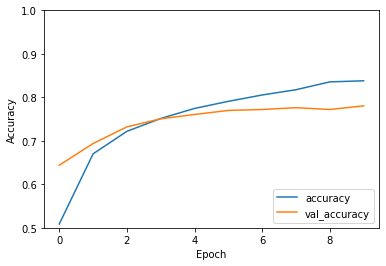

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

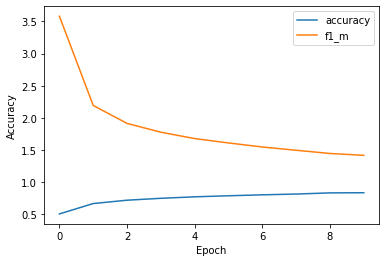

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['f1_m'], label = 'f1_m')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

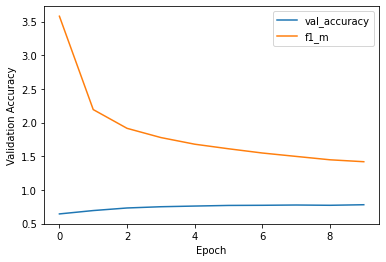

In [42]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['f1_m'], label = 'f1_m')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='upper right')

g. Calculate number of trainable parameters in your final model. 

In [43]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)             

In [44]:
from keras.utils.vis_utils import plot_model

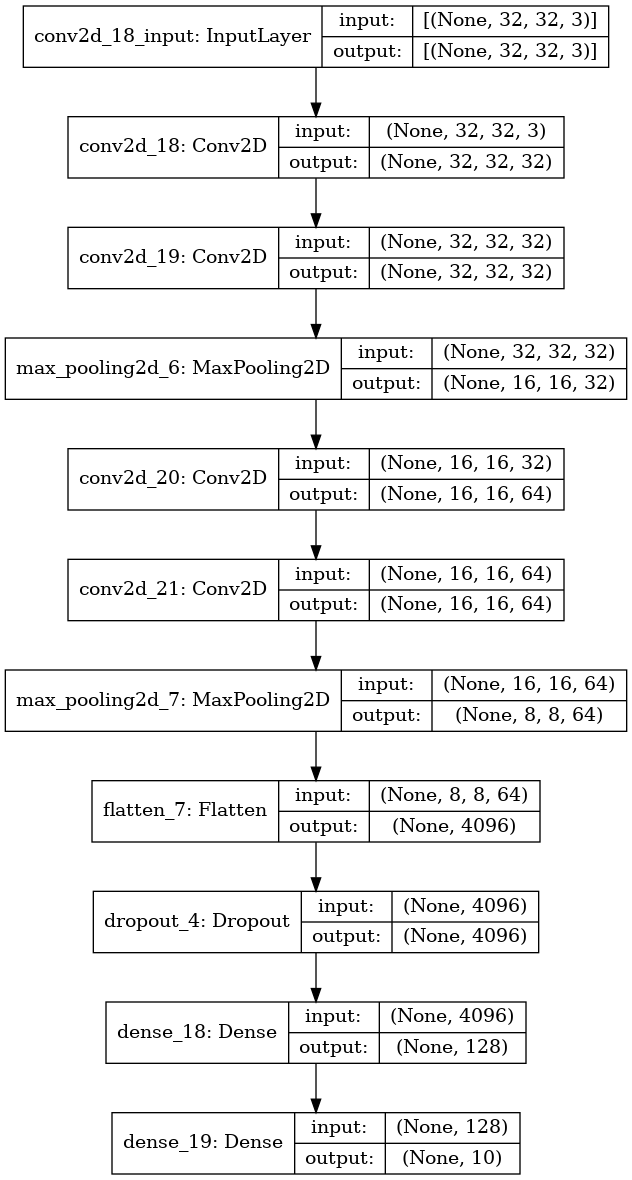

In [45]:
plot_model(model, to_file='final_model.png', show_shapes=True, show_layer_names=True)

In [46]:
# formula to calculate trainable paramters
# pooling, dropout and flatten layers does not have any trainable paramters
# trainable parameters = [(kernel_size * stride)+1] * filter

conv1 = ((3 * 3 * 3) + 1) * 32
conv2 = ((3 * 3 * 32) + 1) * 32
conv3 = ((3 * 3 * 32) + 1) * 64
conv4 = ((3 * 3 * 64) + 1) * 64
dense1 = ((4096) + 1) * 128
dense2 = ((128) + 1) * 10
trainable_parameters = conv1 + conv2 + conv3 + conv4 + dense1 + dense2
print("There are total", trainable_parameters,"trainable paramters in the neural network")

There are total 591274 trainable paramters in the neural network
